In [1]:
#Import all required libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#Import file and print column names
df = pd.read_excel("/home/paul/Documents/Portfolio/New_vehicle_sales/NEWMVSALES.xls")
all_cars = pd.DataFrame(df)
all_cars = all_cars.loc[all_cars['Adjustment Type'] == 'Original']
print(all_cars.columns)

Index(['MEASURE', 'Measure', 'VEHICLE', 'Vehicle Type', 'ASGS_2011', 'Region',
       'TSEST', 'Adjustment Type', 'FREQUENCY', 'Frequency', 'TIME', 'Time',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')


In [3]:
print(df['Adjustment Type'].unique())

['Seasonally Adjusted' 'Original' 'Trend']


In [4]:
print(all_cars.head())
print(all_cars['Adjustment Type'].unique())

     MEASURE Measure  VEHICLE    Vehicle Type  ASGS_2011           Region  \
288        1  Number      500  Other vehicles          4  South Australia   
289        1  Number      500  Other vehicles          4  South Australia   
290        1  Number      500  Other vehicles          4  South Australia   
291        1  Number      500  Other vehicles          4  South Australia   
292        1  Number      500  Other vehicles          4  South Australia   

     TSEST Adjustment Type FREQUENCY Frequency     TIME      Time  Value  \
288     10        Original         M   Monthly  1994-01  Jan-1994  327.0   
289     10        Original         M   Monthly  1994-02  Feb-1994  417.0   
290     10        Original         M   Monthly  1994-03  Mar-1994  651.0   
291     10        Original         M   Monthly  1994-04  Apr-1994  478.0   
292     10        Original         M   Monthly  1994-05  May-1994  574.0   

     Flag Codes  Flags  
288         NaN    NaN  
289         NaN    NaN  
290  

In [5]:
#Like last time we will be utilising the 'Vehicle Type', 'Region', 'TIME' and 'Value' columns
cols = 'Vehicle Type', 'Region', 'TIME', 'Value'
all_cars = pd.DataFrame(all_cars, columns = cols)
all_cars.head()

,Vehicle Type,Region,TIME,Value
288,Other vehicles,South Australia,1994-01,327.0
289,Other vehicles,South Australia,1994-02,417.0
290,Other vehicles,South Australia,1994-03,651.0
291,Other vehicles,South Australia,1994-04,478.0
292,Other vehicles,South Australia,1994-05,574.0


In [6]:
#convert the 'TIME' column to a datetime values
all_cars['TIME'] = pd.to_datetime(all_cars['TIME'])

#sort the values by date
all_cars.sort_values('TIME')

#index the Values and set index for TIME variable
all_cars['Value'].reset_index()
all_cars = all_cars.set_index('TIME')
all_cars.index
print(all_cars.head(10))

              Vehicle Type           Region  Value
TIME                                              
1994-01-01  Other vehicles  South Australia  327.0
1994-02-01  Other vehicles  South Australia  417.0
1994-03-01  Other vehicles  South Australia  651.0
1994-04-01  Other vehicles  South Australia  478.0
1994-05-01  Other vehicles  South Australia  574.0
1994-06-01  Other vehicles  South Australia  917.0
1994-07-01  Other vehicles  South Australia  437.0
1994-08-01  Other vehicles  South Australia  544.0
1994-09-01  Other vehicles  South Australia  462.0
1994-10-01  Other vehicles  South Australia  501.0


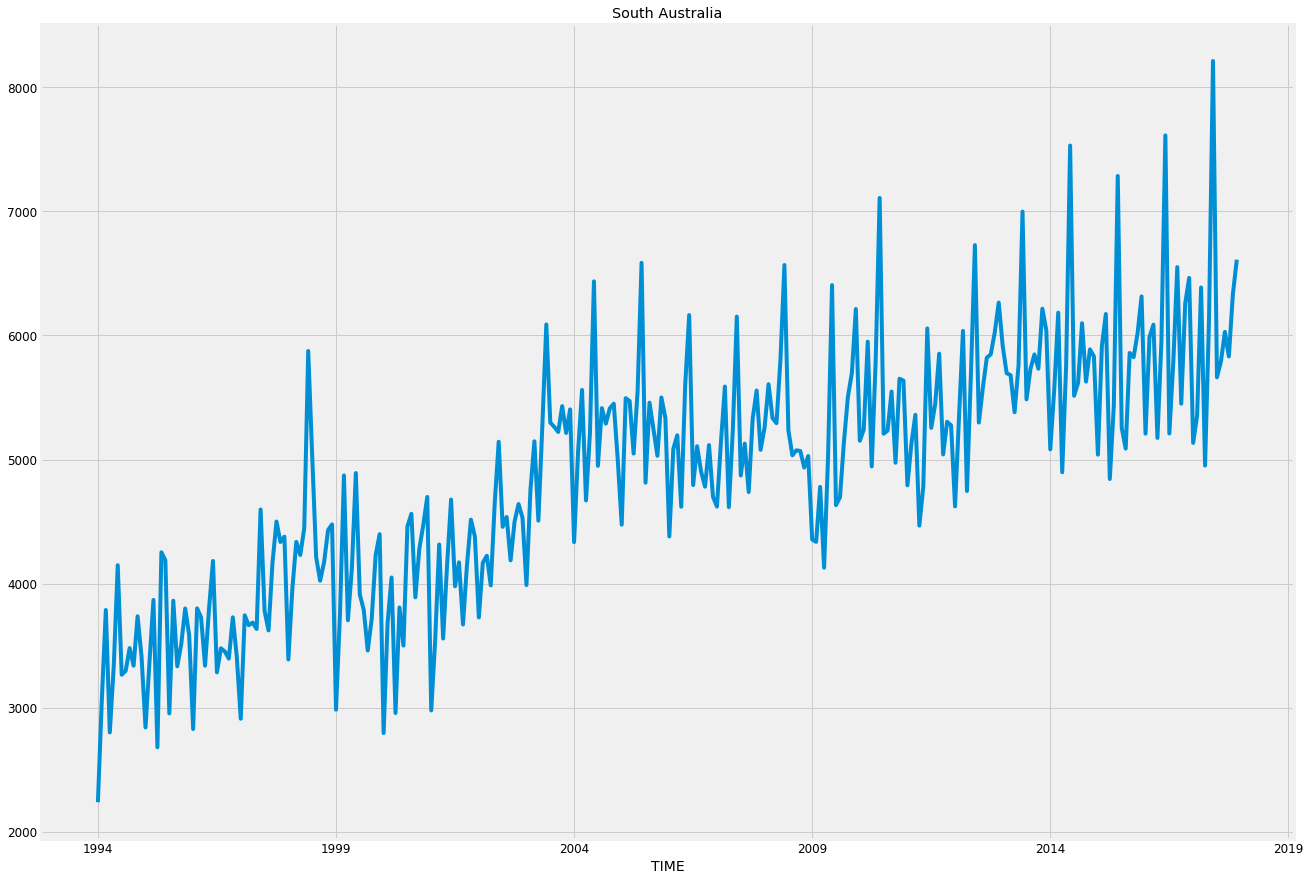

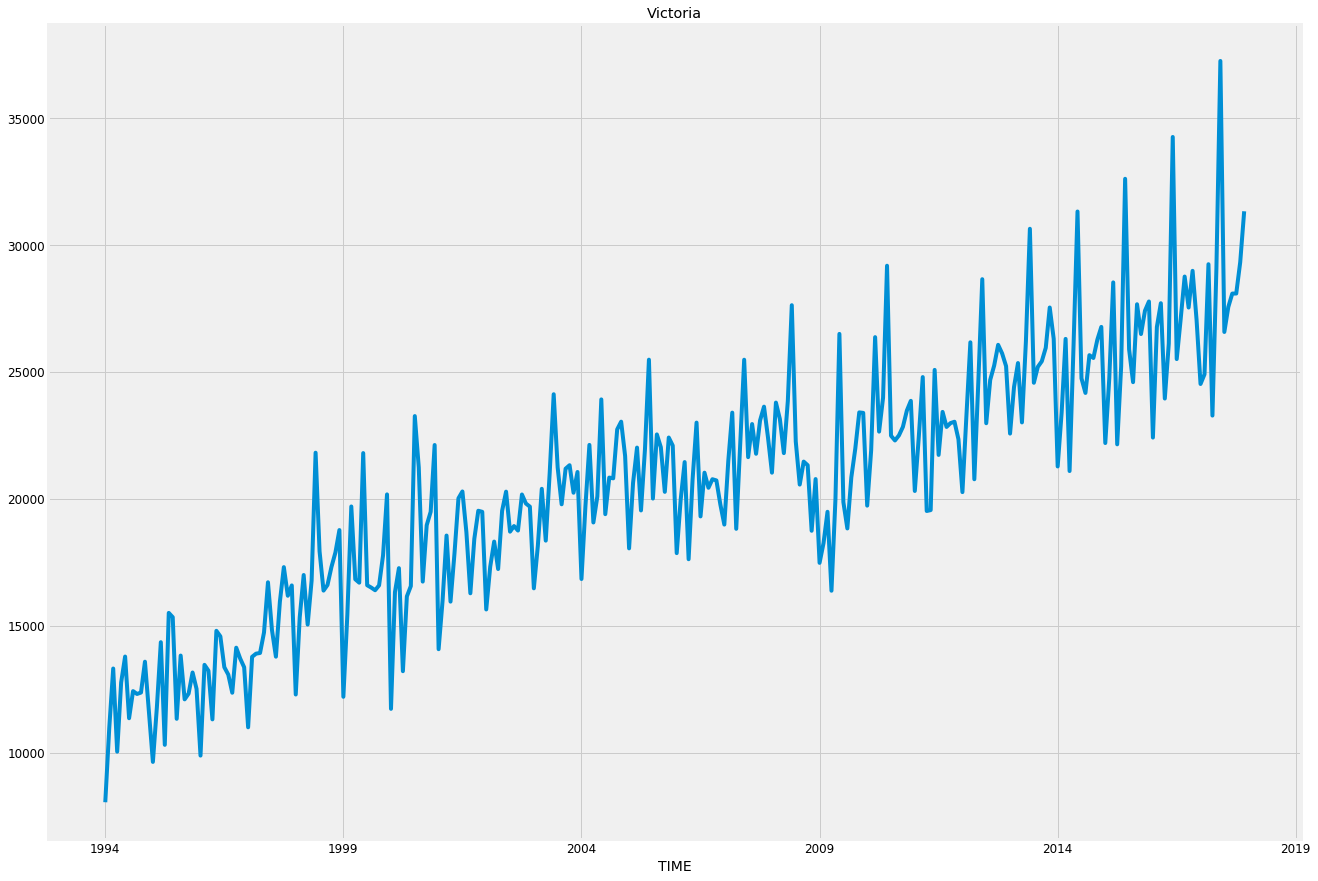

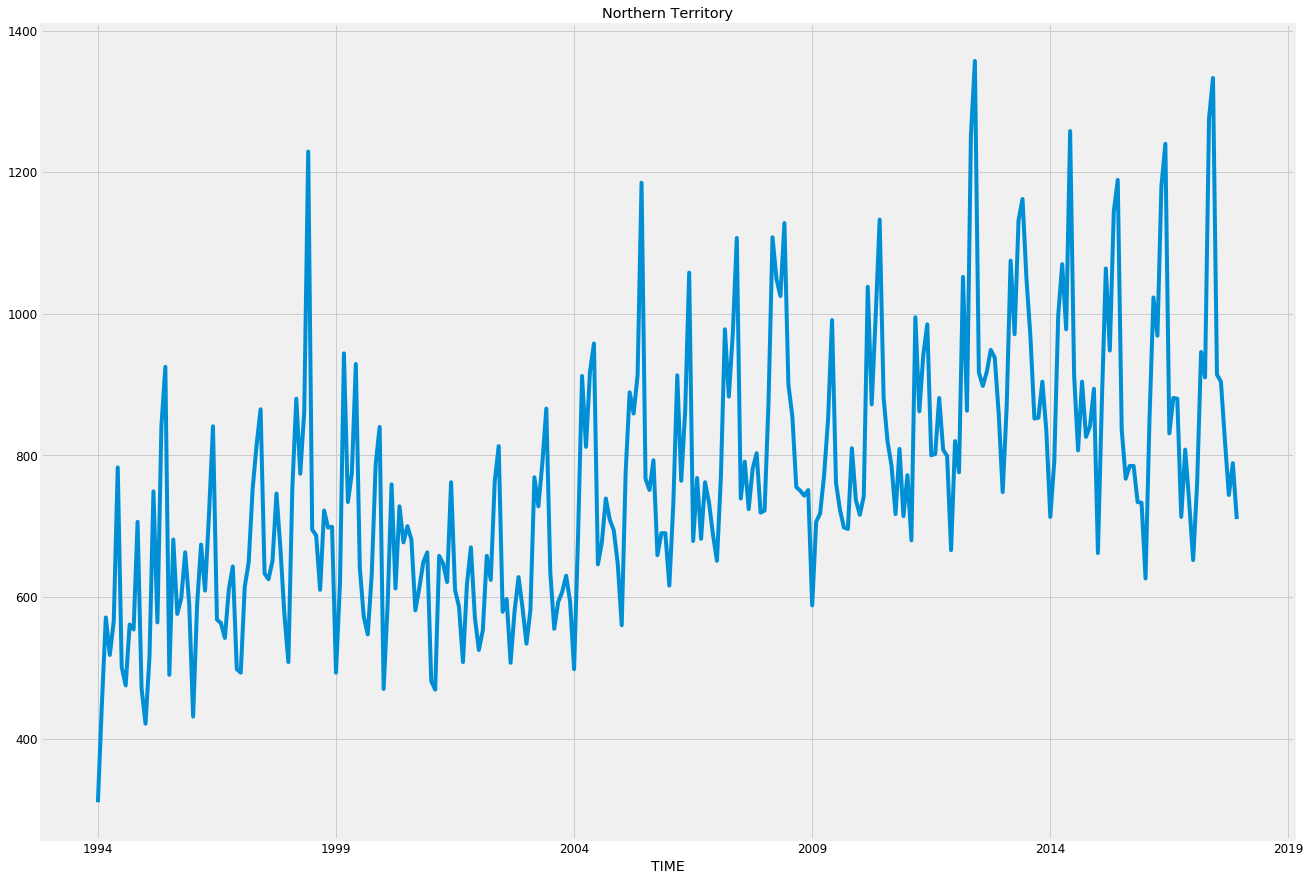

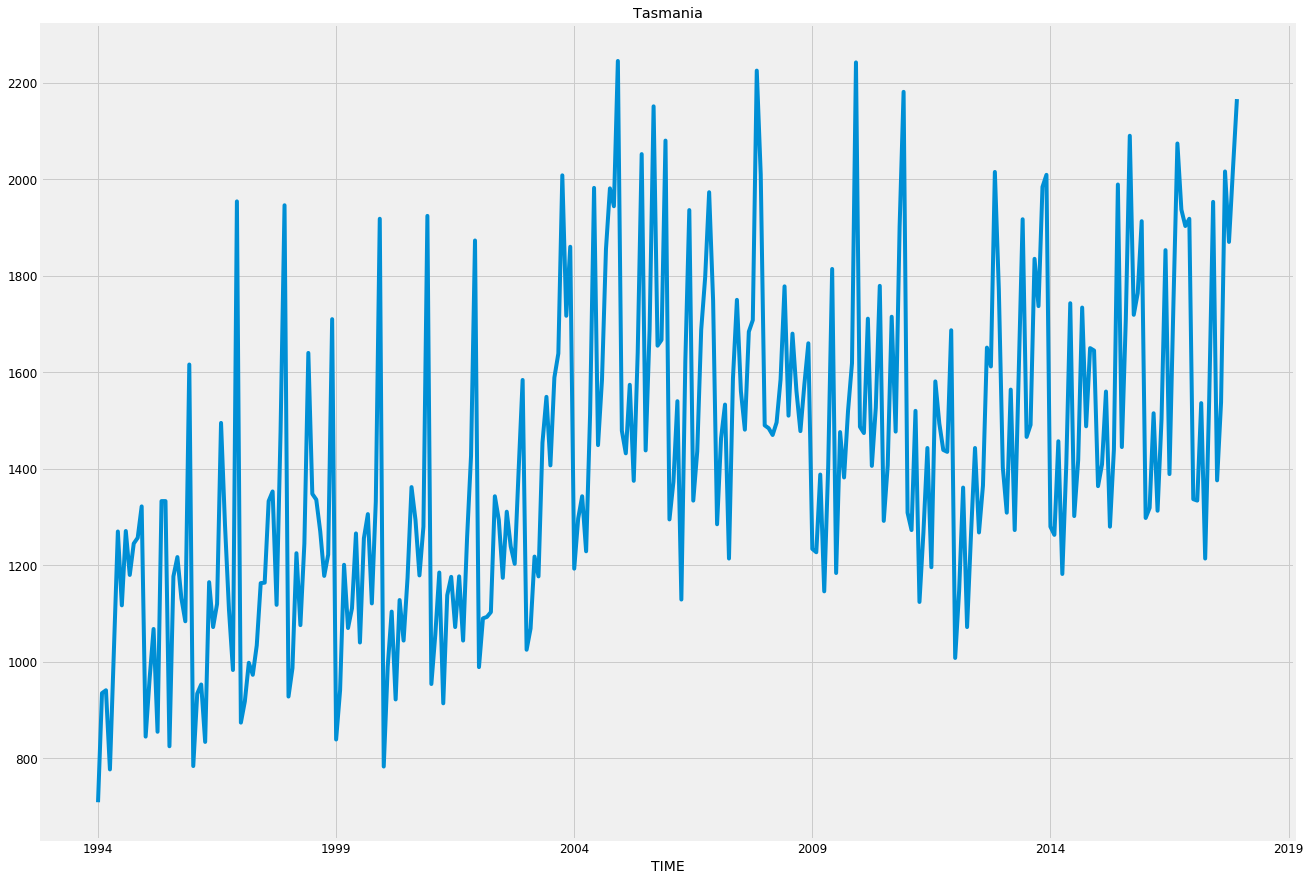

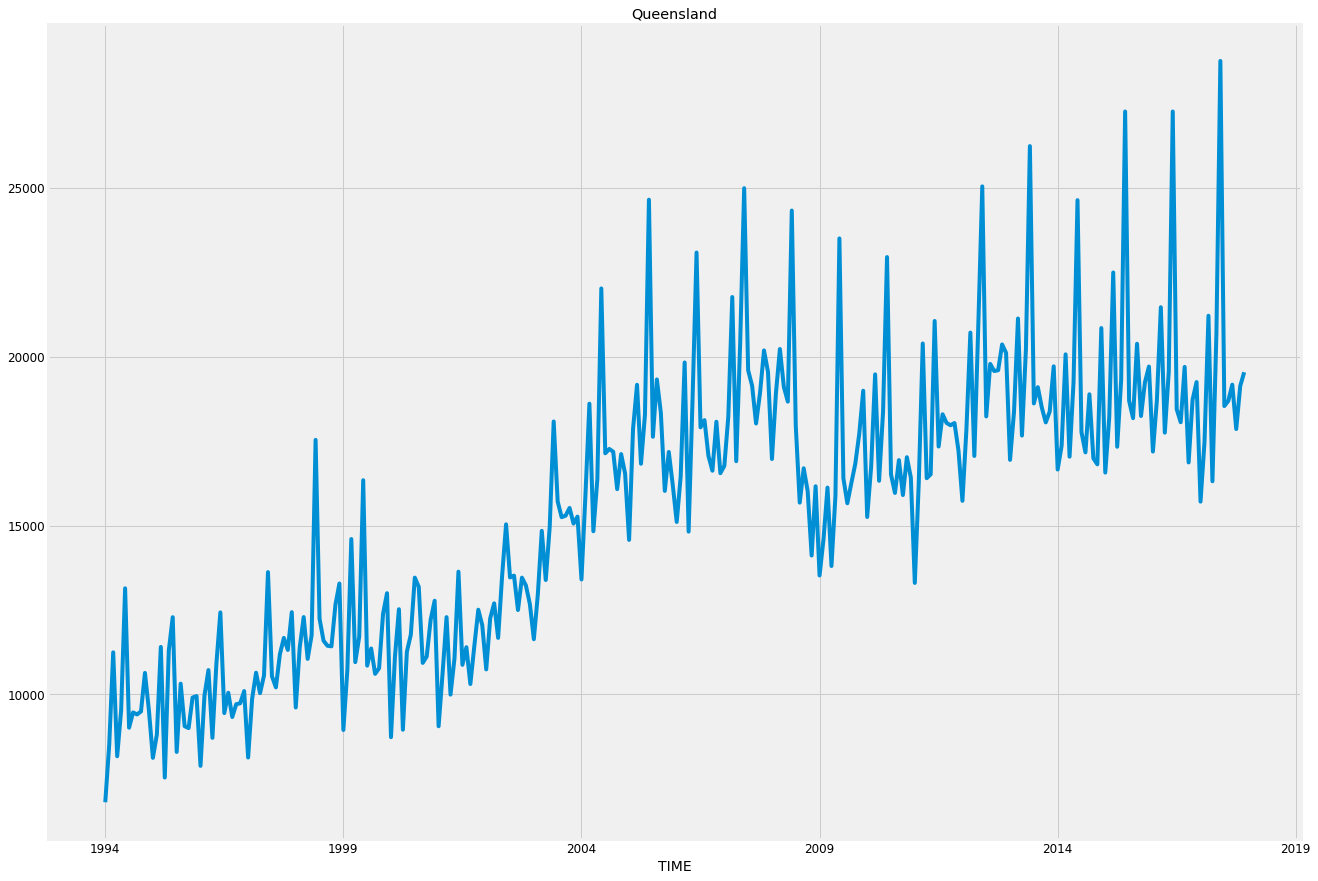

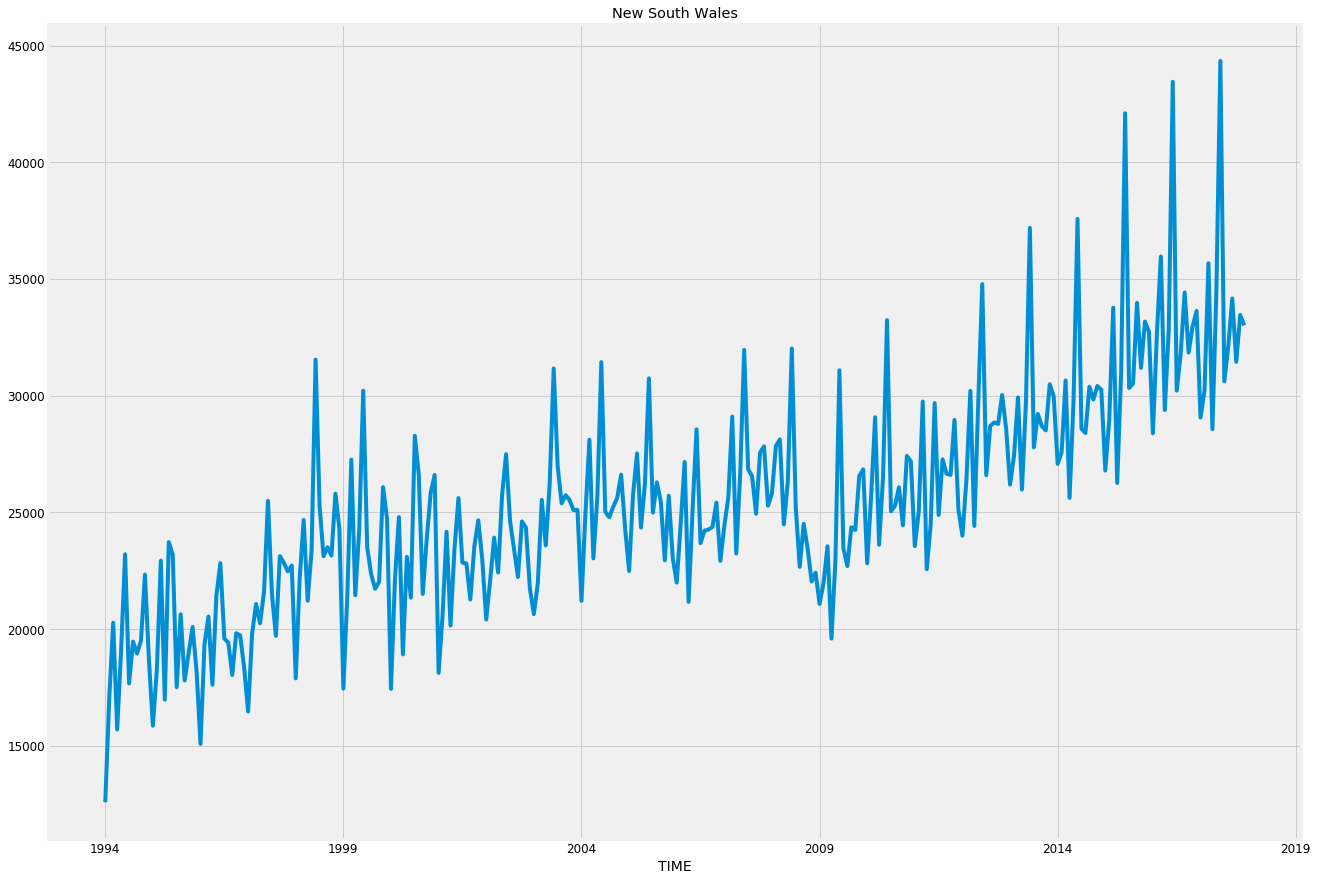

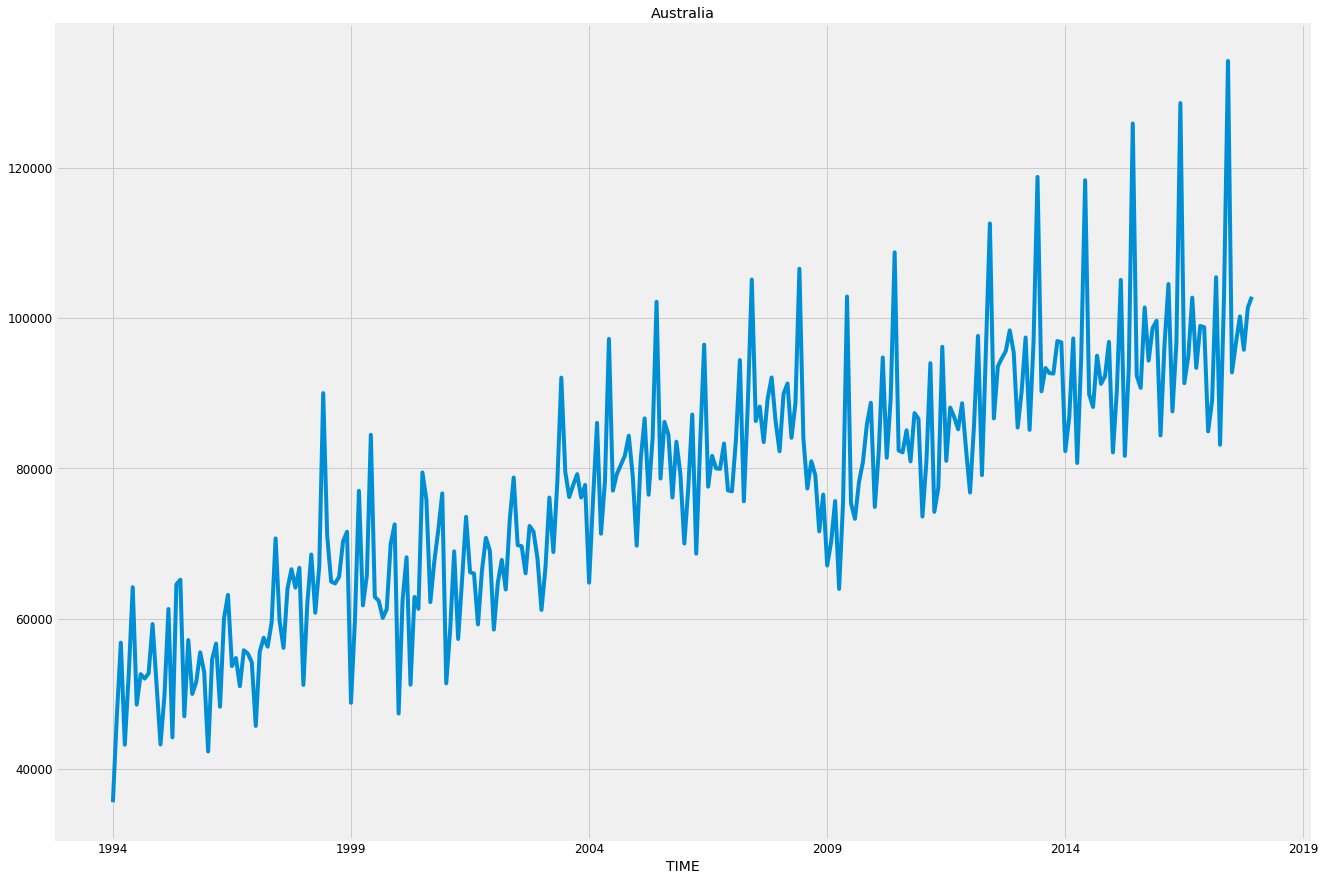

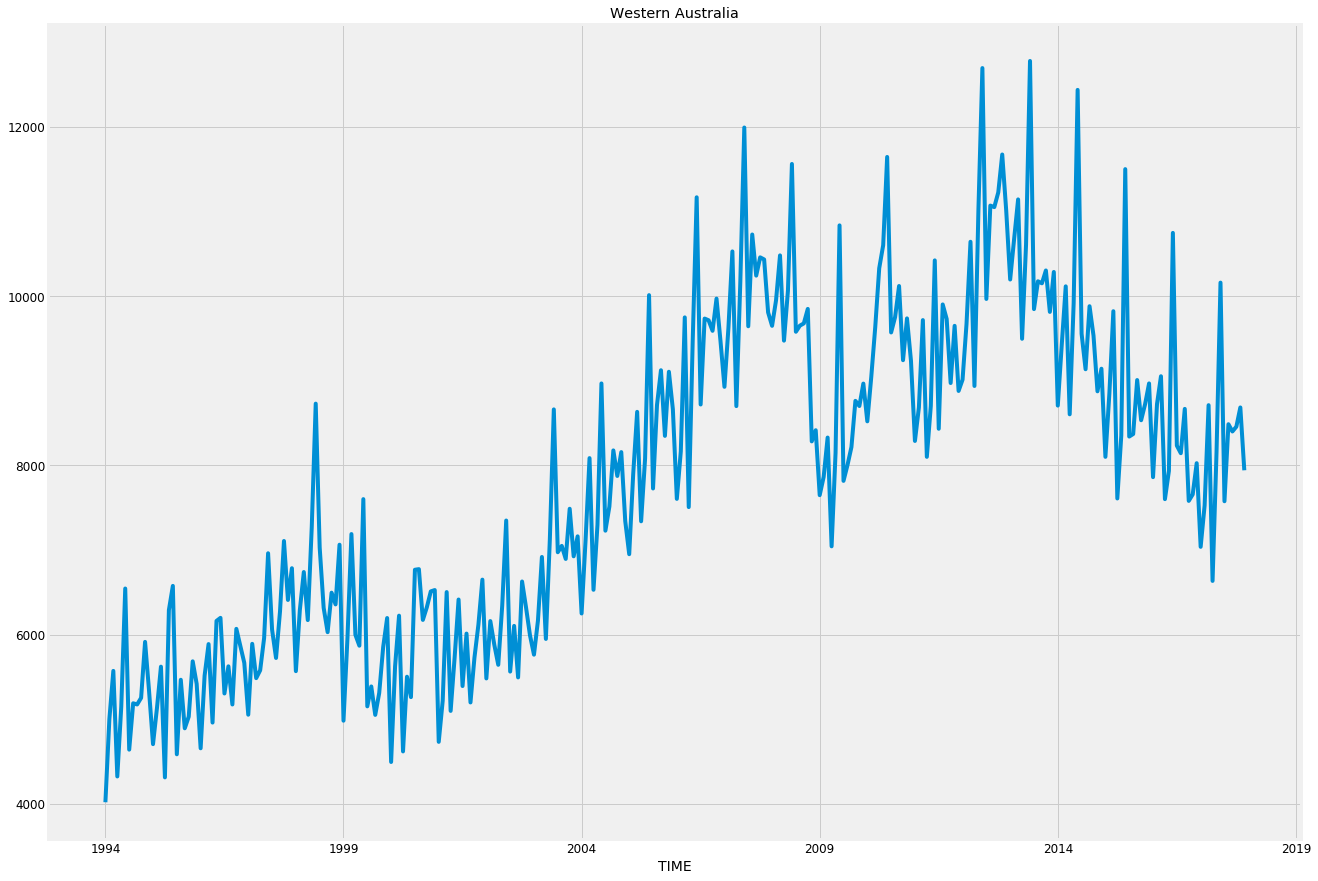

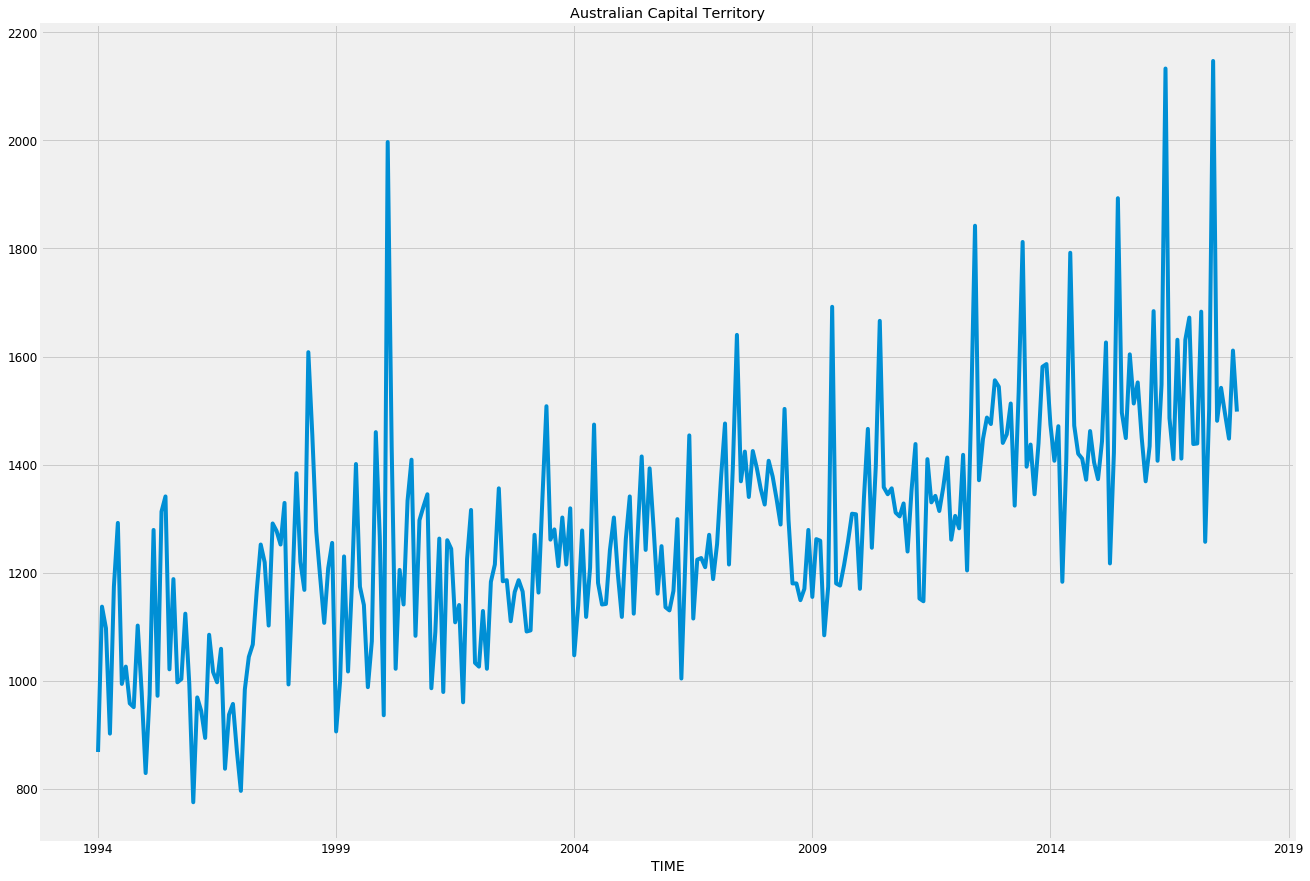

In [7]:
#Find all values in Region column
locations = all_cars['Region'].unique()

#Save a new dataframe with the Vehicle Type variable locked to 'Total Vehicles'
cars = all_cars.loc[all_cars['Vehicle Type'] == 'Total Vehicles']

#Iterate over all values in the Region column
for l in locations:
    
    #Temporarily lock the location to each Region
    car_by_location = cars.loc[cars['Region'] == l]
    
    #Plot each Region's sales values
    y = car_by_location['Value']
    y.plot(figsize=(20, 15), x = None)
    plt.title(l)
    plt.show()

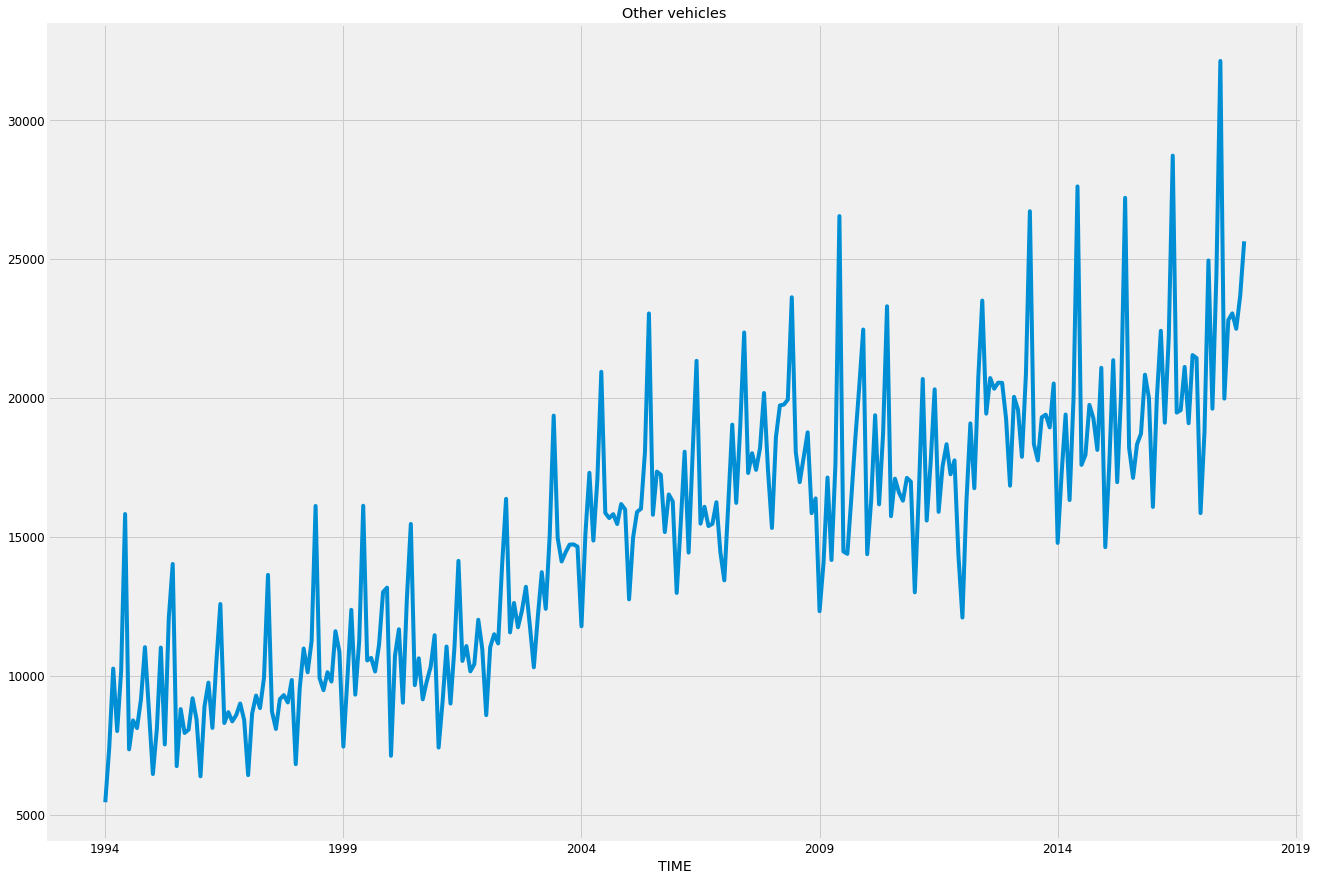

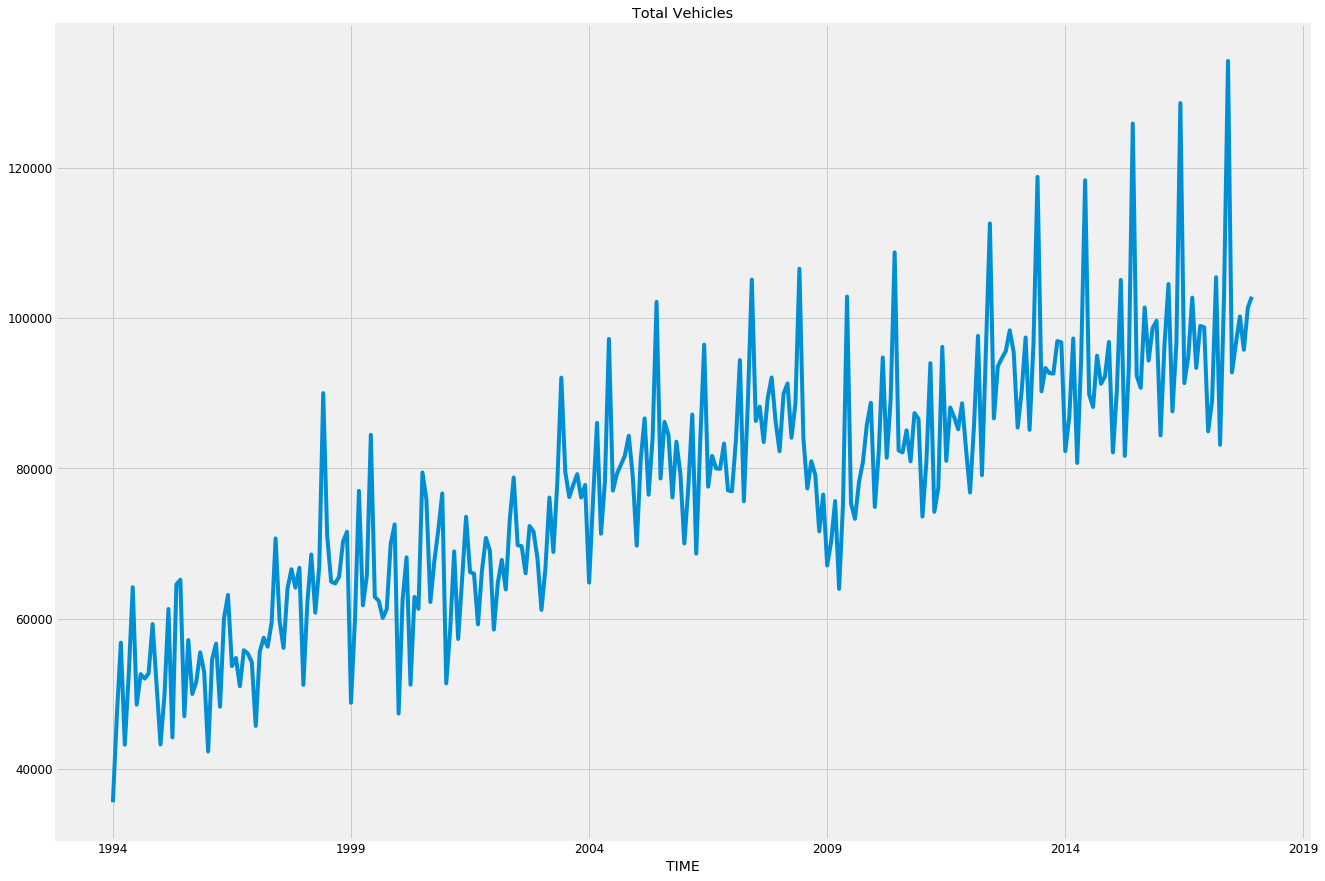

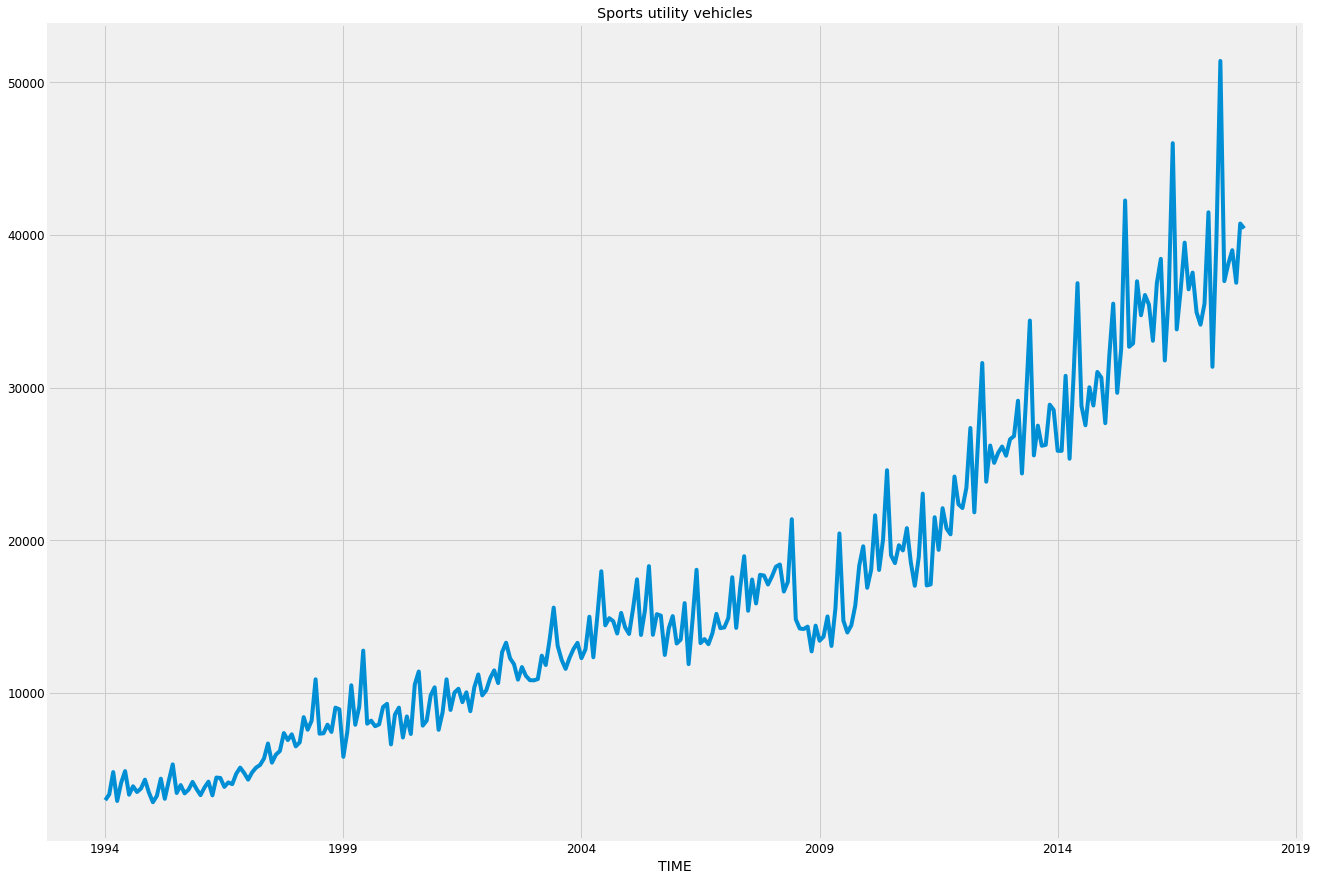

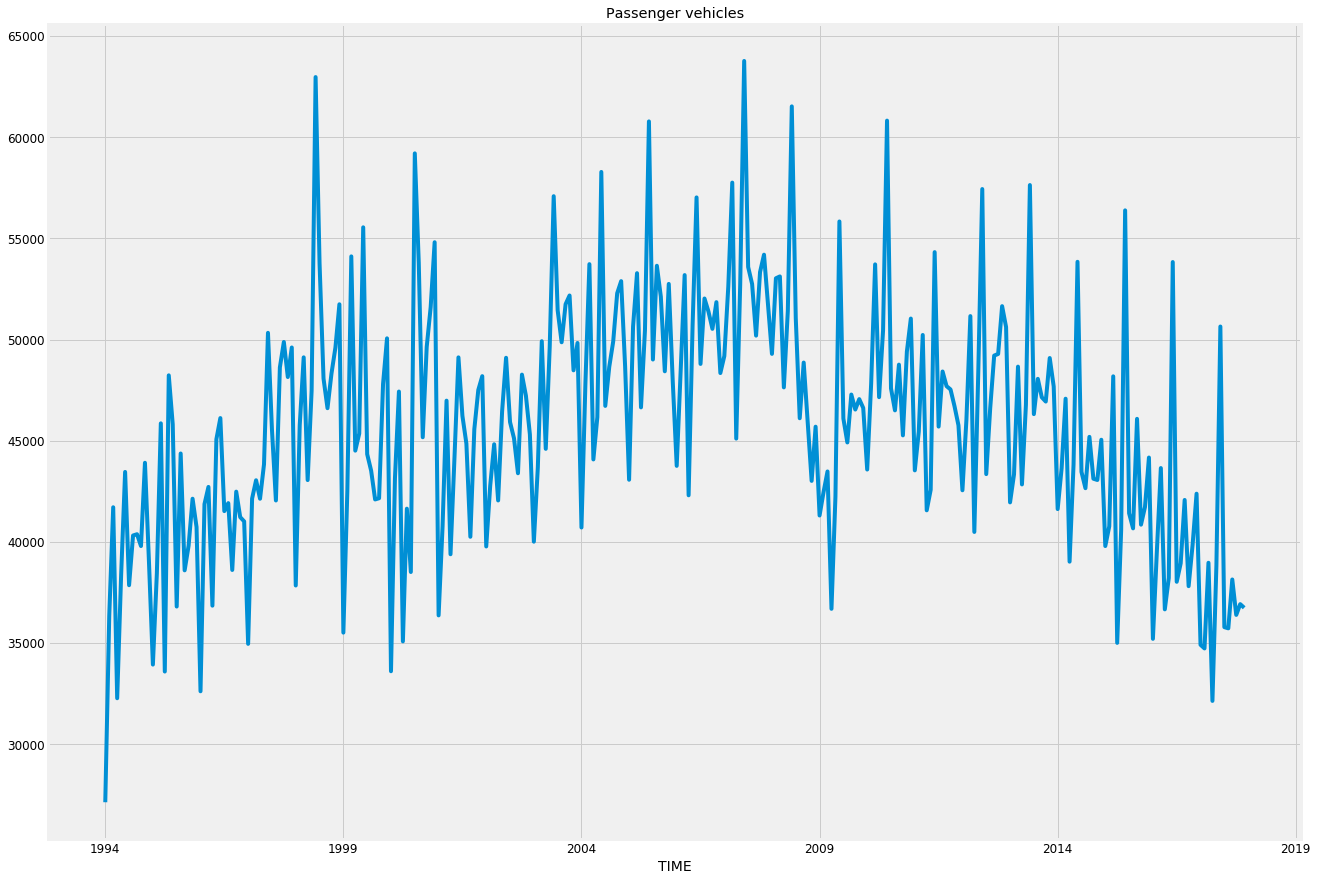

In [8]:
#Find all values in Vehicle Type column
car_type = all_cars['Vehicle Type'].unique()

#Save a new dataframe with the Region variable locked to 'Australia'
all_locations = all_cars.loc[all_cars['Region'] == 'Australia']
#Iterate over all values in the Vehicle Type column
for c in car_type:
    
    #Temporarily lock the location to each Vehicle Type
    cars_by_type = all_locations.loc[all_locations['Vehicle Type'] == c]

    #Plot each Vehicle Type's sales values
    y = cars_by_type['Value']
    y.plot(figsize=(20, 15), x = None)
    plt.title(c)
    plt.show()

In [9]:
all_locations.head()

,Vehicle Type,Region,Value
TIME,,,
1994-01-01,Sports utility vehicles,Australia,2996.0
1994-02-01,Sports utility vehicles,Australia,3368.0
1994-03-01,Sports utility vehicles,Australia,4833.0
1994-04-01,Sports utility vehicles,Australia,2942.0
1994-05-01,Sports utility vehicles,Australia,4125.0


In [10]:
def write_file(compiled_df):
    print('writing file')
    compiled_df.to_csv("/home/paul/Documents/Portfolio/New_vehicle_sales/4_year_forecast_iterated_18-12-18.xls")

In [ ]:
iteration = 1
compiled_df = pd.DataFrame()
results_list = []
results_dict = {}
x = []
y = []
states = np.array(['Northern Territory', 'Queensland', 'New South Wales', 'Australian Capital Territory', 
          'Victoria', 'Tasmania', 'South Australia'])

vehicle_types = np.array(['Other vehicles', 'Passenger vehicles', 'Sports utility vehicles'])


for l in states:
    for v in vehicle_types:
        print('parameters for ' + str(iteration) + ' are '+ v + " & " + l)
        
        car_iter = df.loc[(df['Adjustment Type'] == 'Original') & (df['Vehicle Type'] == v) & (df['Region'] == l)]
        
        cols = 'TIME', 'Value', 'Region', 'Vehicle Type'
        car_iter = pd.DataFrame(car_iter, columns = cols)
        car_iter['TIME'] = car_iter['TIME'] + '-01'
        car_iter['TIME'] = pd.to_datetime(car_iter['TIME'])

        car_iter.sort_values('TIME')
    
    
        car_iter['Value'].reset_index()
        car_iter = car_iter.set_index('TIME')
        car_iter.index

        

        y = car_iter['Value']
        

        p = d = q = range(0, 2)
        pdq = list(itertools.product(p, d, q))
        seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    

        for param in pdq:
            for param_seasonal in seasonal_pdq:
                try:
                    mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                    results = mod.fit()
                    warnings.filterwarnings("ignore")
                    results_list.append(results.aic)
                    x = [param, param_seasonal]
                    results_dict[results.aic] = x

                except:
                    continue
        rl = min(results_list)

        p1 = results_dict[rl][0]
        p2 = results_dict[rl][1]
    
        
        mod = sm.tsa.statespace.SARIMAX(y,
                                    order=p1,
                                    seasonal_order=p2,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

        results = mod.fit()
        print(results.summary().tables[1])
        pred_uc = results.get_forecast(steps = 48)
        pred_ci = pred_uc.conf_int()
    
        prediction_4_year = pd.DataFrame(pred_uc.predicted_mean)
        prediction_4_year.to_csv("/home/paul/Documents/Portfolio/New_vehicle_sales/4_year_forecast_iterated_workings_18-12-18.xls")
    
        prediction_4_year = pd.read_csv("/home/paul/Documents/Portfolio/New_vehicle_sales/4_year_forecast_iterated_workings_18-12-18.xls")
        column_2 = v + " & " + l
        prediction_4_year.columns = ['TIME', column_2]
        if iteration == 1:
            compiled_df['TIME'] = prediction_4_year['TIME']
            compiled_df[column_2] = prediction_4_year[column_2]
        else:
            compiled_df[column_2] = prediction_4_year[column_2]

        iteration += 1

parameters for 1 are Other vehicles & Northern Territory


/home/paul/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2875      0.072      4.013      0.000       0.147       0.428
ma.L1         -0.8438      0.043    -19.797      0.000      -0.927      -0.760
ma.S.L12      -0.9095      0.047    -19.297      0.000      -1.002      -0.817
sigma2       919.1011     78.159     11.759      0.000     765.912    1072.291
parameters for 2 are Passenger vehicles & Northern Territory
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1288      0.085      1.521      0.128      -0.037       0.295
ma.L1         -0.8130      0.044    -18.316      0.000      -0.900      -0.726
ma.S.L12      -1.0814      0.057    -18.871      0.000      -1.194      -0.969
sigma2      1749.2136    190.270      9.193      0.000    1376.291    

In [ ]:
write_file(compiled_df)